## Analyzing some relationships:

In [11]:
import pandas as pd
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from random import randrange, uniform
%matplotlib inline

In [12]:
matchs = pd.read_csv("csv/matchs.csv", sep=',')
champions = pd.read_csv('csv/data_champions.csv', sep=',')
matchs = matchs.drop('Unnamed: 0', 1)
champions = champions.drop('Unnamed: 0', 1)
champions['champion'] = champions.champion.apply(lambda x: x.capitalize())
matchs['champion1'] = matchs.champion1.apply(lambda x: x.capitalize())
matchs['champion2'] = matchs.champion2.apply(lambda x: x.capitalize())
matchs['champion3'] = matchs.champion3.apply(lambda x: x.capitalize())
matchs['champion4'] = matchs.champion4.apply(lambda x: x.capitalize())
matchs['champion5'] = matchs.champion5.apply(lambda x: x.capitalize())

In [ ]:
matchs_winRate = matchs.drop('team', 1)

for a in matchs_winRate.index:
    matchs_winRate.champion1[a]=champions.winRate.loc[(champions['champion']==matchs.champion1[a])\
                                                      & (champions['role']=='Top')].values[0]
    matchs_winRate.champion2[a]=champions.winRate.loc[(champions['champion']==matchs.champion2[a])\
                                                     & (champions['role']=='Jungle')].values[0]
    matchs_winRate.champion3[a]=champions.winRate.loc[(champions['champion']==matchs.champion3[a])\
                                                     & (champions['role']=='Middle')].values[0]
    matchs_winRate.champion4[a]=champions.winRate.loc[(champions['champion']==matchs.champion4[a])\
                                                     & (champions['role']=='ADC')].values[0]
    matchs_winRate.champion5[a]=champions.winRate.loc[(champions['champion']==matchs.champion5[a])\
                                                     & ((champions['role']=='Support') | (champions['role']=='Top'))].values[0]
matchs_winRate.status1 = matchs_winRate["status1"].replace(['   DEFEAT   '], 0)
matchs_winRate.status1 = matchs_winRate["status1"].replace(['   VICTORY   '], 1)

In [ ]:
matchs_kda = matchs.drop('team', 1)

for a in matchs_kda.index:
    matchs_kda.champion1[a]=(champions.kills.loc[(champions['champion']==matchs.champion1[a])\
                                                      & (champions['role']=='Top')].values[0]) - \
    (champions.death.loc[(champions['champion']==matchs.champion1[a]) & (champions['role']=='Top')].values[0])
    
    matchs_kda.champion2[a]=(champions.kills.loc[(champions['champion']==matchs.champion2[a])\
                                                     & (champions['role']=='Jungle')].values[0]) - \
    (champions.death.loc[(champions['champion']==matchs.champion2[a])\
                                                     & (champions['role']=='Jungle')].values[0])
    
    matchs_kda.champion3[a]=(champions.kills.loc[(champions['champion']==matchs.champion3[a])\
                                                     & (champions['role']=='Middle')].values[0]) - \
    (champions.death.loc[(champions['champion']==matchs.champion2[a])\
                                                     & (champions['role']=='Jungle')].values[0])
    
    matchs_kda.champion4[a]=(champions.kills.loc[(champions['champion']==matchs.champion4[a])\
                                                     & (champions['role']=='ADC')].values[0]) - \
    (champions.death.loc[(champions['champion']==matchs.champion4[a])\
                                                     & (champions['role']=='ADC')].values[0])
    
    matchs_kda.champion5[a]=(champions.kills.loc[(champions['champion']==matchs.champion5[a])\
                                                     & ((champions['role']=='Support') | (champions['role']=='Top'))].values[0]) -\
    (champions.death.loc[(champions['champion']==matchs.champion5[a])\
                                                     & ((champions['role']=='Support') | (champions['role']=='Top'))].values[0])
matchs_kda.status1 = matchs_winRate["status1"].replace(['defeat'], 0)
matchs_kda.status1 = matchs_winRate["status1"].replace(['victory'], 1)

In [15]:
matchs_analisys = pd.DataFrame(index=range(58),columns=["winRate", "result", "gold", "kda"])
for a in matchs_winRate.index:
    matchs_analisys.winRate[a]=np.mean([matchs_winRate["champion1"][a], matchs_winRate["champion2"][a],\
                                       matchs_winRate["champion3"][a], matchs_winRate["champion4"][a],\
                                       matchs_winRate["champion5"][a]], dtype=np.float64)
    matchs_analisys.result[a]=matchs_winRate.status1[a]
    matchs_analisys.gold[a]=matchs_winRate.gold[a]
    matchs_analisys.kda[a]=np.mean([matchs_kda["champion1"][a], matchs_kda["champion2"][a],\
                                       matchs_kda["champion3"][a], matchs_kda["champion4"][a],\
                                       matchs_kda["champion5"][a]], dtype=np.float64)

x=matchs_analisys.winRate.loc[matchs_analisys["result"]==0].values    
y=matchs_analisys.winRate.loc[matchs_analisys["result"]==1].values
matchs_analisys1 = pd.DataFrame(x, columns=["winRate"])
matchs_analisys2 = pd.DataFrame(y, columns=["winRate"])
matchs_analisys1["goldEarned"]=matchs_analisys.gold.loc[matchs_analisys["result"]==0].values    
matchs_analisys2["goldEarned"]=matchs_analisys.gold.loc[matchs_analisys["result"]==1].values
matchs_analisys1["kda"]=matchs_analisys.kda.loc[matchs_analisys["result"]==0].values    
matchs_analisys2["kda"]=matchs_analisys.kda.loc[matchs_analisys["result"]==1].values

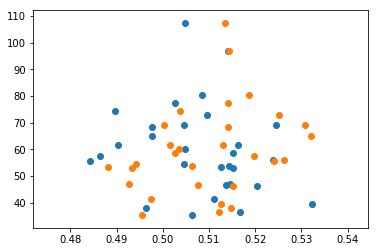

In [16]:
fig = plt.subplots(1,figsize=(6,4)) 
plt.scatter(x=matchs_analisys1['winRate'], y=matchs_analisys1['goldEarned'])
plt.scatter(x=matchs_analisys2['winRate'], y=matchs_analisys1['goldEarned'])

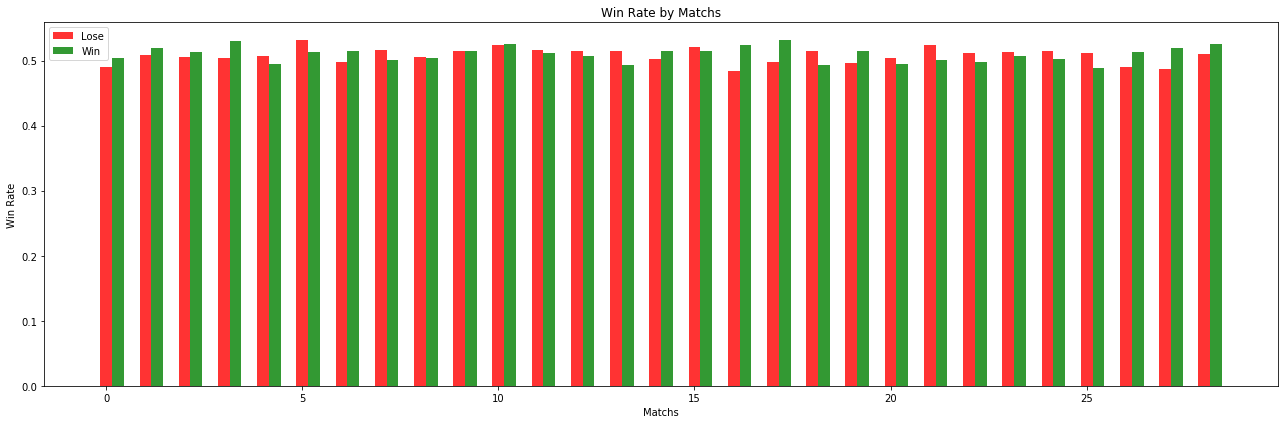

In [17]:
N = 29
winRate1 = np.array(matchs_analisys1['winRate'])
winRate2 = np.array(matchs_analisys2['winRate'])
width = 0.30

fig, ax = plt.subplots(figsize=(18,6))
index = np.arange(N)
opacity = 0.8

rects1 = plt.bar(index, winRate1, width,
                 alpha=opacity,
                 color='r',
                 label='Lose')
 
rects2 = plt.bar(index + width, winRate2, width,
                 alpha=opacity,
                 color='g',
                 label='Win')

plt.xlabel('Matchs')
plt.ylabel('Win Rate')
plt.title('Win Rate by Matchs')
plt.legend()
 
plt.tight_layout()
plt.show()


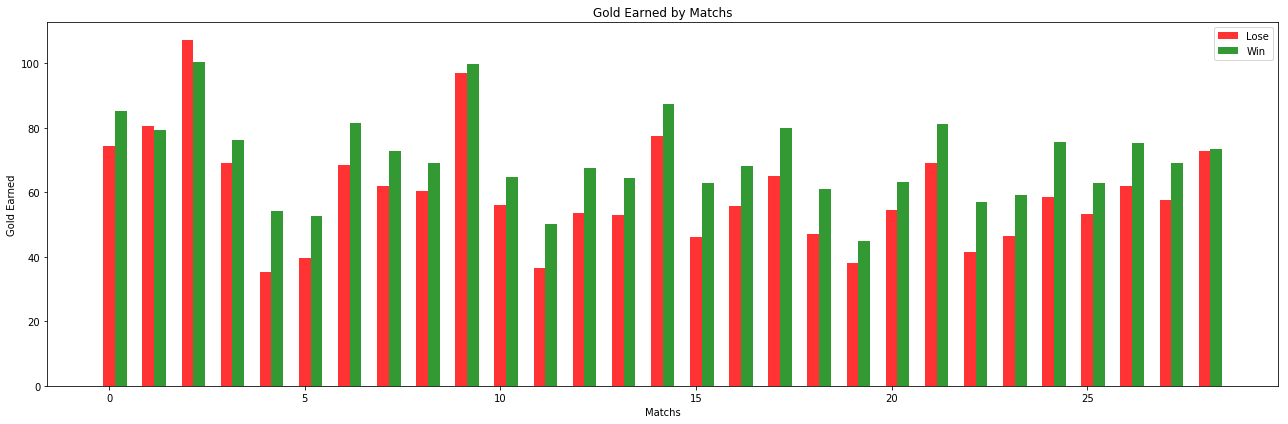

In [18]:
N = 29
winRate1 = np.array(matchs_analisys1['goldEarned'])
winRate2 = np.array(matchs_analisys2['goldEarned'])
width = 0.30

fig, ax = plt.subplots(figsize=(18,6))
index = np.arange(N)
opacity = 0.8

rects1 = plt.bar(index, winRate1, width,
                 alpha=opacity,
                 color='r',
                 label='Lose')
 
rects2 = plt.bar(index + width, winRate2, width,
                 alpha=opacity,
                 color='g',
                 label='Win')

plt.xlabel('Matchs')
plt.ylabel('Gold Earned')
plt.title('Gold Earned by Matchs')
plt.legend()
 
plt.tight_layout()
plt.show()

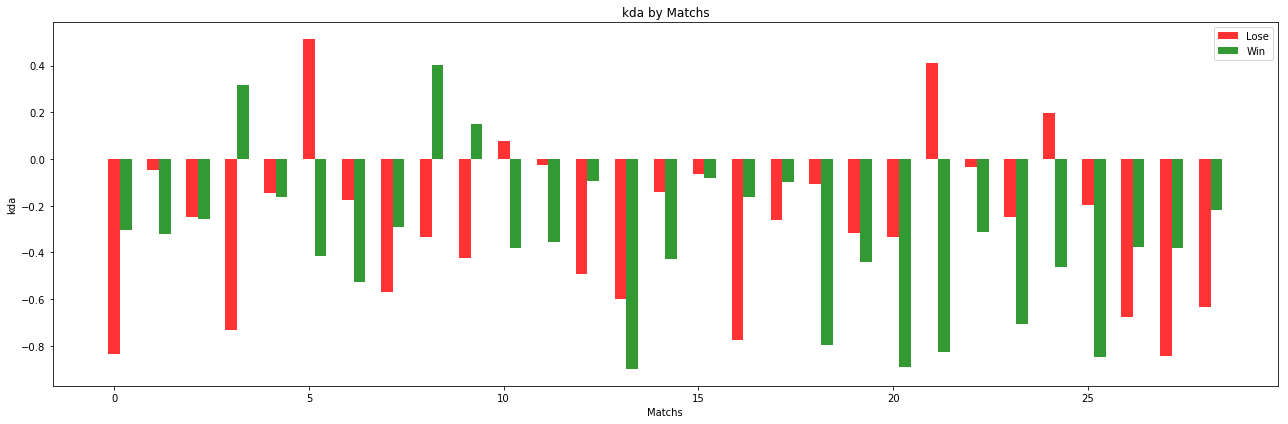

In [19]:
N = 29
winRate1 = np.array(matchs_analisys1['kda'])
winRate2 = np.array(matchs_analisys2['kda'])
width = 0.30

fig, ax = plt.subplots(figsize=(18,6))
index = np.arange(N)
opacity = 0.8

rects1 = plt.bar(index, winRate1, width,
                 alpha=opacity,
                 color='r',
                 label='Lose')
 
rects2 = plt.bar(index + width, winRate2, width,
                 alpha=opacity,
                 color='g',
                 label='Win')

plt.xlabel('Matchs')
plt.ylabel('kda')
plt.title('kda by Matchs')
plt.legend()
 
plt.tight_layout()
plt.show()

In [28]:
x = matchs_winRate.loc[matchs_winRate["status1"]==0].values
y = matchs_winRate.loc[matchs_winRate["status1"]==1].values
matchs_winRate_role0 = pd.DataFrame(x, columns = ["champion1", "champion2", "champion3", "champion4", "champion5", "status", "date", "gold"])
matchs_winRate_role1 = pd.DataFrame(y, columns = ["champion1", "champion2", "champion3", "champion4", "champion5", "status", "date", "gold"])
matchs_winRate_role0.to_csv("csv/winRate_role_lose.csv")
matchs_winRate_role1.to_csv("csv/winRate_role_win.csv")
matchs_analisys1.to_csv("csv/overview_lose.csv")
matchs_analisys2.to_csv("csv/overview_win.csv")

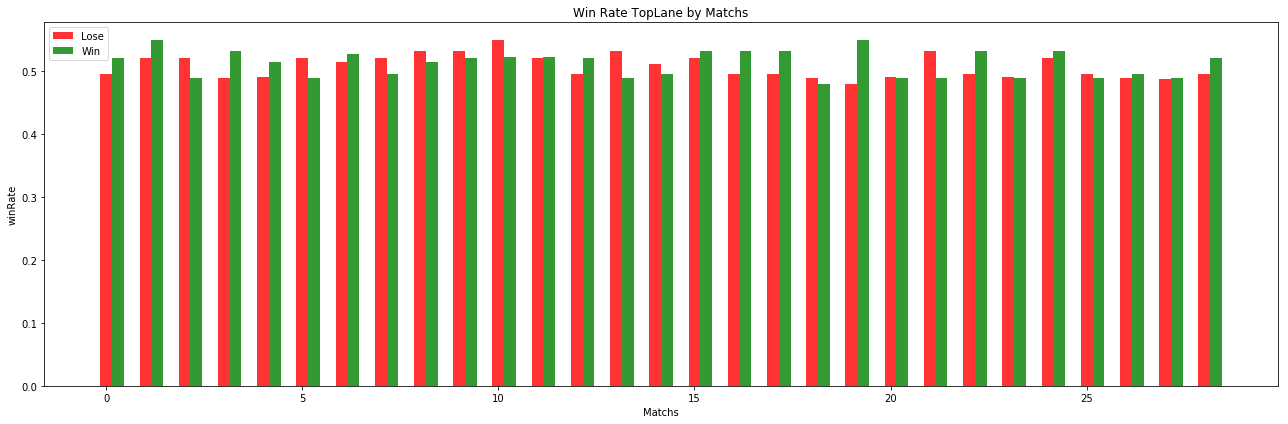

In [27]:
N = 29
winRate1 = np.array(matchs_winRate_role0["champion1"])
winRate2 = np.array(matchs_winRate_role1["champion1"])
width = 0.30

fig, ax = plt.subplots(figsize=(18,6))
index = np.arange(N)
opacity = 0.8

rects1 = plt.bar(index, winRate1, width,
                 alpha=opacity,
                 color='r',
                 label='Lose')
 
rects2 = plt.bar(index + width, winRate2, width,
                 alpha=opacity,
                 color='g',
                 label='Win')

plt.xlabel('Matchs')
plt.ylabel('winRate')
plt.title('Win Rate TopLane by Matchs')
plt.legend()
 
plt.tight_layout()
plt.show()

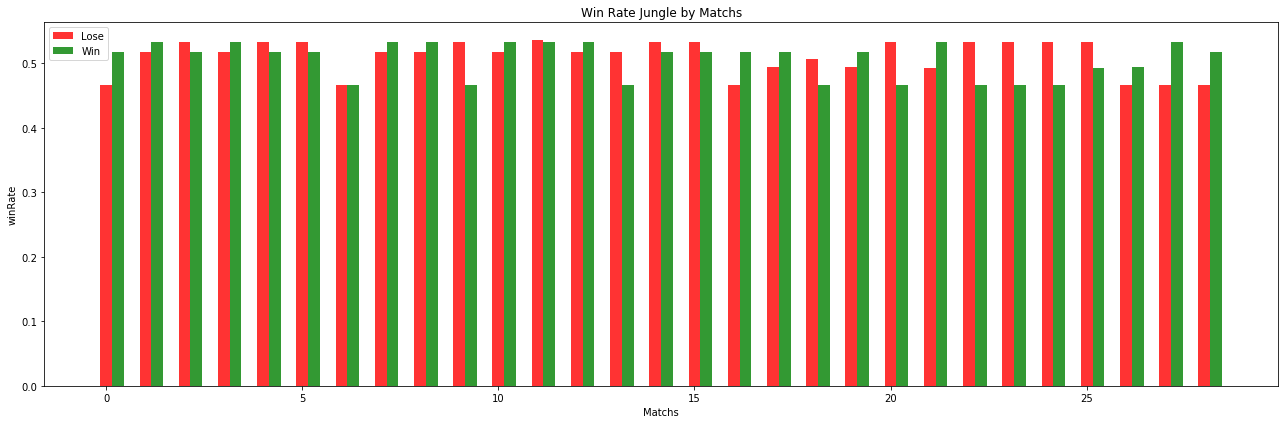

In [22]:
N = 29
winRate1 = np.array(matchs_winRate_role0["champion2"])
winRate2 = np.array(matchs_winRate_role1["champion2"])
width = 0.30

fig, ax = plt.subplots(figsize=(18,6))
index = np.arange(N)
opacity = 0.8

rects1 = plt.bar(index, winRate1, width,
                 alpha=opacity,
                 color='r',
                 label='Lose')
 
rects2 = plt.bar(index + width, winRate2, width,
                 alpha=opacity,
                 color='g',
                 label='Win')

plt.xlabel('Matchs')
plt.ylabel('winRate')
plt.title('Win Rate Jungle by Matchs')
plt.legend()
 
plt.tight_layout()
plt.show()

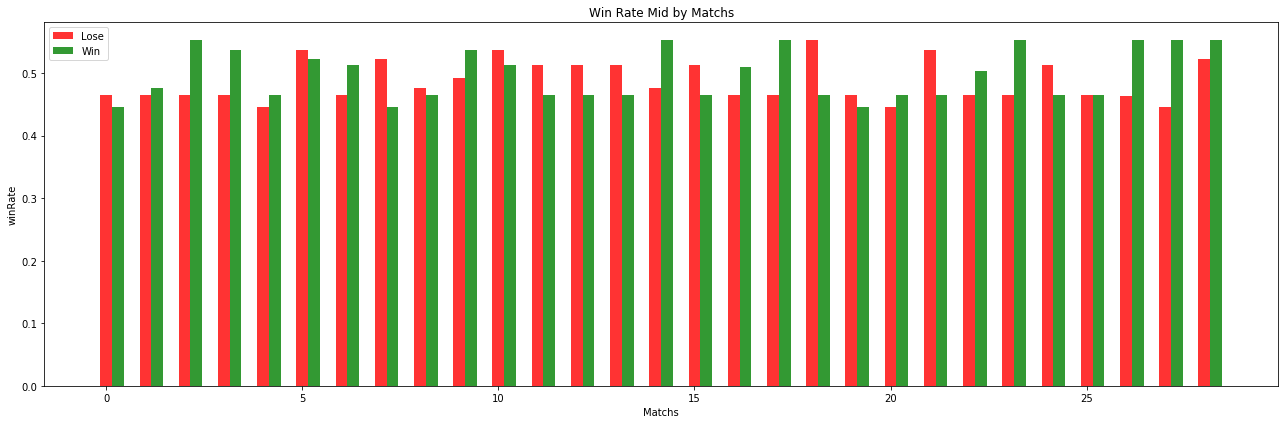

In [23]:
N = 29
winRate1 = np.array(matchs_winRate_role0["champion3"])
winRate2 = np.array(matchs_winRate_role1["champion3"])
width = 0.30

fig, ax = plt.subplots(figsize=(18,6))
index = np.arange(N)
opacity = 0.8

rects1 = plt.bar(index, winRate1, width,
                 alpha=opacity,
                 color='r',
                 label='Lose')
 
rects2 = plt.bar(index + width, winRate2, width,
                 alpha=opacity,
                 color='g',
                 label='Win')

plt.xlabel('Matchs')
plt.ylabel('winRate')
plt.title('Win Rate Mid by Matchs')
plt.legend()
 
plt.tight_layout()
plt.show()

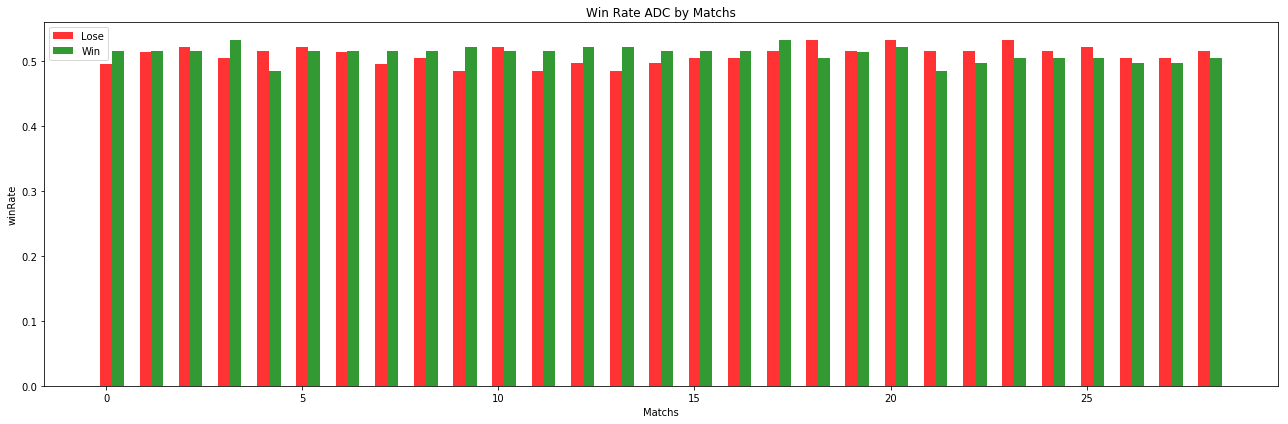

In [24]:
N = 29
winRate1 = np.array(matchs_winRate_role0["champion4"])
winRate2 = np.array(matchs_winRate_role1["champion4"])
width = 0.30

fig, ax = plt.subplots(figsize=(18,6))
index = np.arange(N)
opacity = 0.8

rects1 = plt.bar(index, winRate1, width,
                 alpha=opacity,
                 color='r',
                 label='Lose')
 
rects2 = plt.bar(index + width, winRate2, width,
                 alpha=opacity,
                 color='g',
                 label='Win')

plt.xlabel('Matchs')
plt.ylabel('winRate')
plt.title('Win Rate ADC by Matchs')
plt.legend()
 
plt.tight_layout()
plt.show()

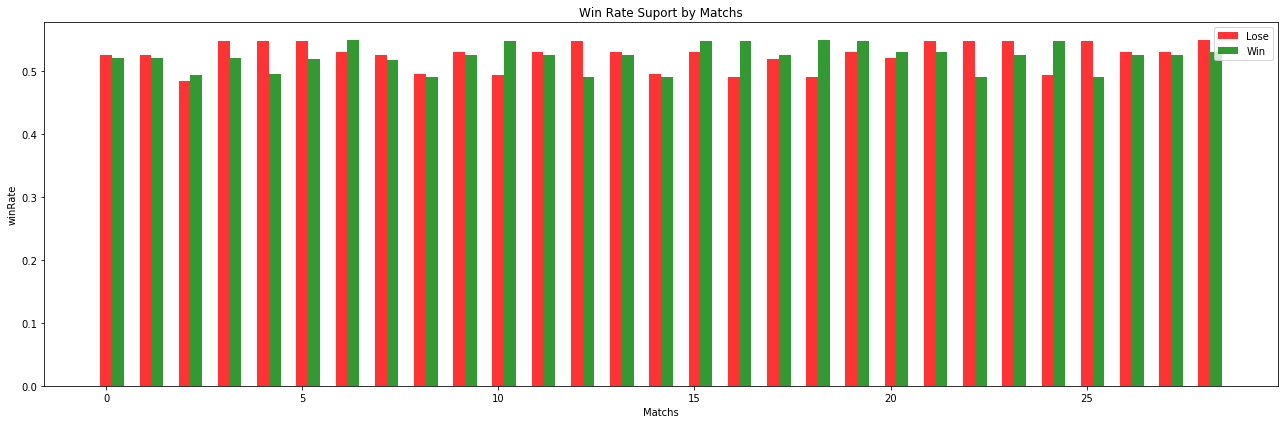

In [25]:
N = 29
winRate1 = np.array(matchs_winRate_role0["champion5"])
winRate2 = np.array(matchs_winRate_role1["champion5"])
width = 0.30

fig, ax = plt.subplots(figsize=(18,6))
index = np.arange(N)
opacity = 0.8

rects1 = plt.bar(index, winRate1, width,
                 alpha=opacity,
                 color='r',
                 label='Lose')
 
rects2 = plt.bar(index + width, winRate2, width,
                 alpha=opacity,
                 color='g',
                 label='Win')

plt.xlabel('Matchs')
plt.ylabel('winRate')
plt.title('Win Rate Suport by Matchs')
plt.legend()
 
plt.tight_layout()
plt.show()